# Earnings

Notebook para aprender data science con Python y las herramientas Pandas y Matplotlib.

Para aprender Pandas y Matplotlib he utilizados datos 14 nominas con conceptos salariales ficticios y cantidades aleatorias.

Estos datos están guardados en una base de datos llamada `earnings.db` que se encuentra dentro de la carpeta `data`. Los esquemas de todas las tablas creadas en la base de datos están presentes en el archivo `tables.py`.



In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import sqlite3

In [2]:
ACTUAL_YEAR = 2024
LABELS_FONT_SIZE = 14
TITLE_FONT_SIZE = 17
TITLE_PAD = 20
TICK_ROTATION = 70
ANNOTATES_STYLE = dict(size=12, color="black")
ALPHA = 0.5

In [3]:
conn = sqlite3.connect("data/earnings.sqlite")
df = pd.read_sql_query("SELECT * FROM earnings;", conn)
conn.close()

df["label"] = df["month_name"] + " " + df["year"].astype(str)
df_actual_year = df[df["year"] == ACTUAL_YEAR].sort_values(by="month_number")
df_last_year = df[df["year"] == ACTUAL_YEAR - 1].sort_values(by="month_number")

In [4]:
def set_common_properties(ax):
    ax.legend()
    ax.grid()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d €"))
    ax.tick_params(axis="x", labelrotation=TICK_ROTATION)
    ax.set_ylabel("Euros (€)", fontsize=LABELS_FONT_SIZE)

In [5]:
def plot_earnings_concepts_by_month(ax, df):
    df_actual_year_and_two_months_group_by_concept_label = (
        df.drop(df[df["concept"].isin(["liquido", "total"])].index)
        .groupby(["year", "month_number", "month_name", "label", "concept_label"])[
            "amount"
        ]
        .sum()
        .reset_index()
        .sort_values(by=["year", "month_number"], ascending=True)
    )
    df_actual_year_and_two_months_group_by_concept_label["amount"] = (
        df_actual_year_and_two_months_group_by_concept_label["amount"].round(2)
    )

    for (
        concept_label
    ) in df_actual_year_and_two_months_group_by_concept_label.concept_label.unique():
        df_concept = df_actual_year_and_two_months_group_by_concept_label[
            df_actual_year_and_two_months_group_by_concept_label.concept_label
            == concept_label
        ]

        ax.plot(
            df_concept["label"],
            df_concept["amount"],
            marker="o",
            label=concept_label,
        )

        for i in range(len(df_concept)):
            y = df_concept["amount"].iloc[i]

            ax.text(
                i,
                y + 30,
                f"{concept_label}: {y} €",
                horizontalalignment="center",
                verticalalignment="center",
                bbox=dict(facecolor="white", boxstyle="round", alpha=0.7),
                size=10,
                color="black",
            )

    ax.set_title("Salario por concepto", fontsize=TITLE_FONT_SIZE, pad=TITLE_PAD)
    ax.set_xlabel("Año y mes", fontsize=LABELS_FONT_SIZE)

    set_common_properties(ax)

    return ax

In [6]:
def plot_earnings_concepts_by_month_others(ax, df):
    df_actual_year_and_two_months_group_by_concept = (
        df.drop(
            df[
                df["concept"].isin(
                    [
                        "liquido",
                        "total",
                        "Disponibilidad",
                        "Salario base",
                        "Mejora voluntaria",
                    ]
                )
            ].index
        )
        .groupby(["year", "month_number", "month_name", "label", "concept"])["amount"]
        .sum()
        .reset_index()
        .sort_values(by=["year", "month_number"], ascending=True)
    )
    df_actual_year_and_two_months_group_by_concept["amount"] = (
        df_actual_year_and_two_months_group_by_concept["amount"].round(2)
    )

    for concept in df_actual_year_and_two_months_group_by_concept.concept.unique():
        df_concept = df_actual_year_and_two_months_group_by_concept[
            df_actual_year_and_two_months_group_by_concept.concept == concept
        ]

        ax.plot(
            df_concept["label"],
            df_concept["amount"],
            marker="o",
            label=concept,
        )

        for i in range(len(df_concept)):
            y = df_concept["amount"].iloc[i]
            x = df_concept["label"].iloc[i]

            ax.text(
                x,
                y,
                f"{concept}: {y} €",
                horizontalalignment="center",
                verticalalignment="center",
                bbox=dict(facecolor="white", boxstyle="round", alpha=0.7),
                size=10,
                color="black",
            )

    ax.set_title(
        "Salario por concepto (Otros)", fontsize=TITLE_FONT_SIZE, pad=TITLE_PAD
    )
    ax.set_xlabel("Año y mes", fontsize=LABELS_FONT_SIZE)

    set_common_properties(ax)

    return ax

In [7]:
def plot_earnings_by_month(ax):
    df_last_year_liquido = (
        df_last_year[df_last_year.concept == "liquido"]
        .groupby(["month_name", "month_number"])["amount"]
        .sum()
        .reset_index()
        .sort_values(by="month_number")
    )
    df_actual_year_liquido = (
        df_actual_year[df_actual_year.concept == "liquido"]
        .groupby(["month_name", "month_number"])["amount"]
        .sum()
        .reset_index()
        .sort_values(by="month_number")
    )

    df_last_year_liquido["amount"] = df_last_year_liquido["amount"].round(2)
    df_actual_year_liquido["amount"] = df_actual_year_liquido["amount"].round(2)

    ax.plot(
        df_actual_year_liquido["month_name"],
        df_actual_year_liquido["amount"],
        color="Slateblue",
        marker="o",
        label="Año actual",
    )
    ax.plot(
        df_last_year_liquido["month_name"],
        df_last_year_liquido["amount"],
        linestyle="--",
        color="orange",
        marker="o",
        label="Año anterior",
    )

    for i in range(len(df_actual_year_liquido)):
        y = df_actual_year_liquido["amount"].iloc[i]
        x = df_actual_year_liquido["month_name"].iloc[i]

        ax.text(
            x,
            y + 15,
            f"{y} €",
            horizontalalignment="center",
            verticalalignment="center",
            bbox=dict(facecolor="skyblue", alpha=ALPHA, boxstyle="round"),
            **ANNOTATES_STYLE,
        )
    for i in range(len(df_last_year_liquido)):
        y = df_last_year_liquido["amount"].iloc[i]
        x = df_last_year_liquido["month_name"].iloc[i]

        ax.text(
            x,
            y + 15,
            f"{y} €",
            horizontalalignment="center",
            verticalalignment="center",
            bbox=dict(facecolor="orange", alpha=ALPHA, boxstyle="round"),
            **ANNOTATES_STYLE,
        )

    ax.set_title("Salario por mes", fontsize=TITLE_FONT_SIZE, pad=TITLE_PAD)
    ax.set_xlabel("Mes", fontsize=LABELS_FONT_SIZE)

    set_common_properties(ax)

    return ax

In [8]:
def plots_bars():
    def plot_earnings_by_year(ax):
        df_total_earnings_by_year = (
            df[df.concept == "total"].groupby(["year"])["amount"].sum().reset_index()
        )
        df_total_earnings_by_year["amount"] = df_total_earnings_by_year["amount"].round(
            2
        )

        ax.bar(
            df_total_earnings_by_year["year"],
            df_total_earnings_by_year["amount"],
            label="Salario anual bruto",
            width=0.1,
        )
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))

        for i in range(len(df_total_earnings_by_year)):
            y = df_total_earnings_by_year["amount"].iloc[i]
            x = df_total_earnings_by_year["year"].iloc[i]
            ax.text(
                x,
                y,
                f"{y} €",
                horizontalalignment="center",
                verticalalignment="center",
                bbox=dict(facecolor="skyblue", boxstyle="round"),
                **ANNOTATES_STYLE,
            )

        ax.set_title("Salario anual por año", fontsize=TITLE_FONT_SIZE, pad=TITLE_PAD)
        ax.set_xlabel("Año", fontsize=LABELS_FONT_SIZE)

        set_common_properties(ax)

        return ax

    def plot_earnings_mean_by_year(ax):
        df_mean_earnings_by_year = (
            df[df.concept == "liquido"].groupby("year")["amount"].mean().reset_index()
        )
        df_mean_earnings_by_year["amount"] = df_mean_earnings_by_year["amount"].round(2)

        ax.bar(
            df_mean_earnings_by_year["year"],
            df_mean_earnings_by_year["amount"],
            label="Salario anual medio neto",
            width=0.1,
        )
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))

        for i in range(len(df_mean_earnings_by_year)):
            y = df_mean_earnings_by_year["amount"].iloc[i]
            x = df_mean_earnings_by_year["year"].iloc[i]
            ax.text(
                x,
                y,
                f"{y} €",
                horizontalalignment="center",
                verticalalignment="center",
                bbox=dict(facecolor="skyblue", boxstyle="round"),
                **ANNOTATES_STYLE,
            )

        ax.set_title("Salario medio por año", fontsize=TITLE_FONT_SIZE, pad=TITLE_PAD)
        ax.set_xlabel("Año", fontsize=LABELS_FONT_SIZE)

        set_common_properties(ax)

        return ax

    return (plot_earnings_by_year, plot_earnings_mean_by_year)

In [9]:
def plot_irpf_by_month(ax, df):
    df_irpf = pd.merge(
        df[df.concept == "total"],
        df[df.concept == "liquido"],
        how="inner",
        on=["year", "month_number", "type", "label"],
    )
    df_irpf["irpf_payment"] = round(df_irpf["amount_x"] - df_irpf["amount_y"], 2)
    df_irpf = (
        df_irpf.groupby(["year", "month_number", "label"])["irpf_payment"]
        .sum()
        .reset_index()
    )

    ax.plot(df_irpf["label"], df_irpf["irpf_payment"], label="IRPF", marker="o")

    for i in range(len(df_irpf)):
        y = df_irpf["irpf_payment"].iloc[i]
        x = df_irpf["label"].iloc[i]

        ax.text(
            x,
            y + 2.5,
            f"{y} €",
            horizontalalignment="center",
            verticalalignment="center",
            bbox=dict(facecolor="skyblue", alpha=ALPHA, boxstyle="round"),
            **ANNOTATES_STYLE,
        )

    ax.set_title("IRPF por mes", fontsize=TITLE_FONT_SIZE, pad=TITLE_PAD)
    ax.set_xlabel("Año y mes", fontsize=LABELS_FONT_SIZE)

    set_common_properties(ax)

    return ax

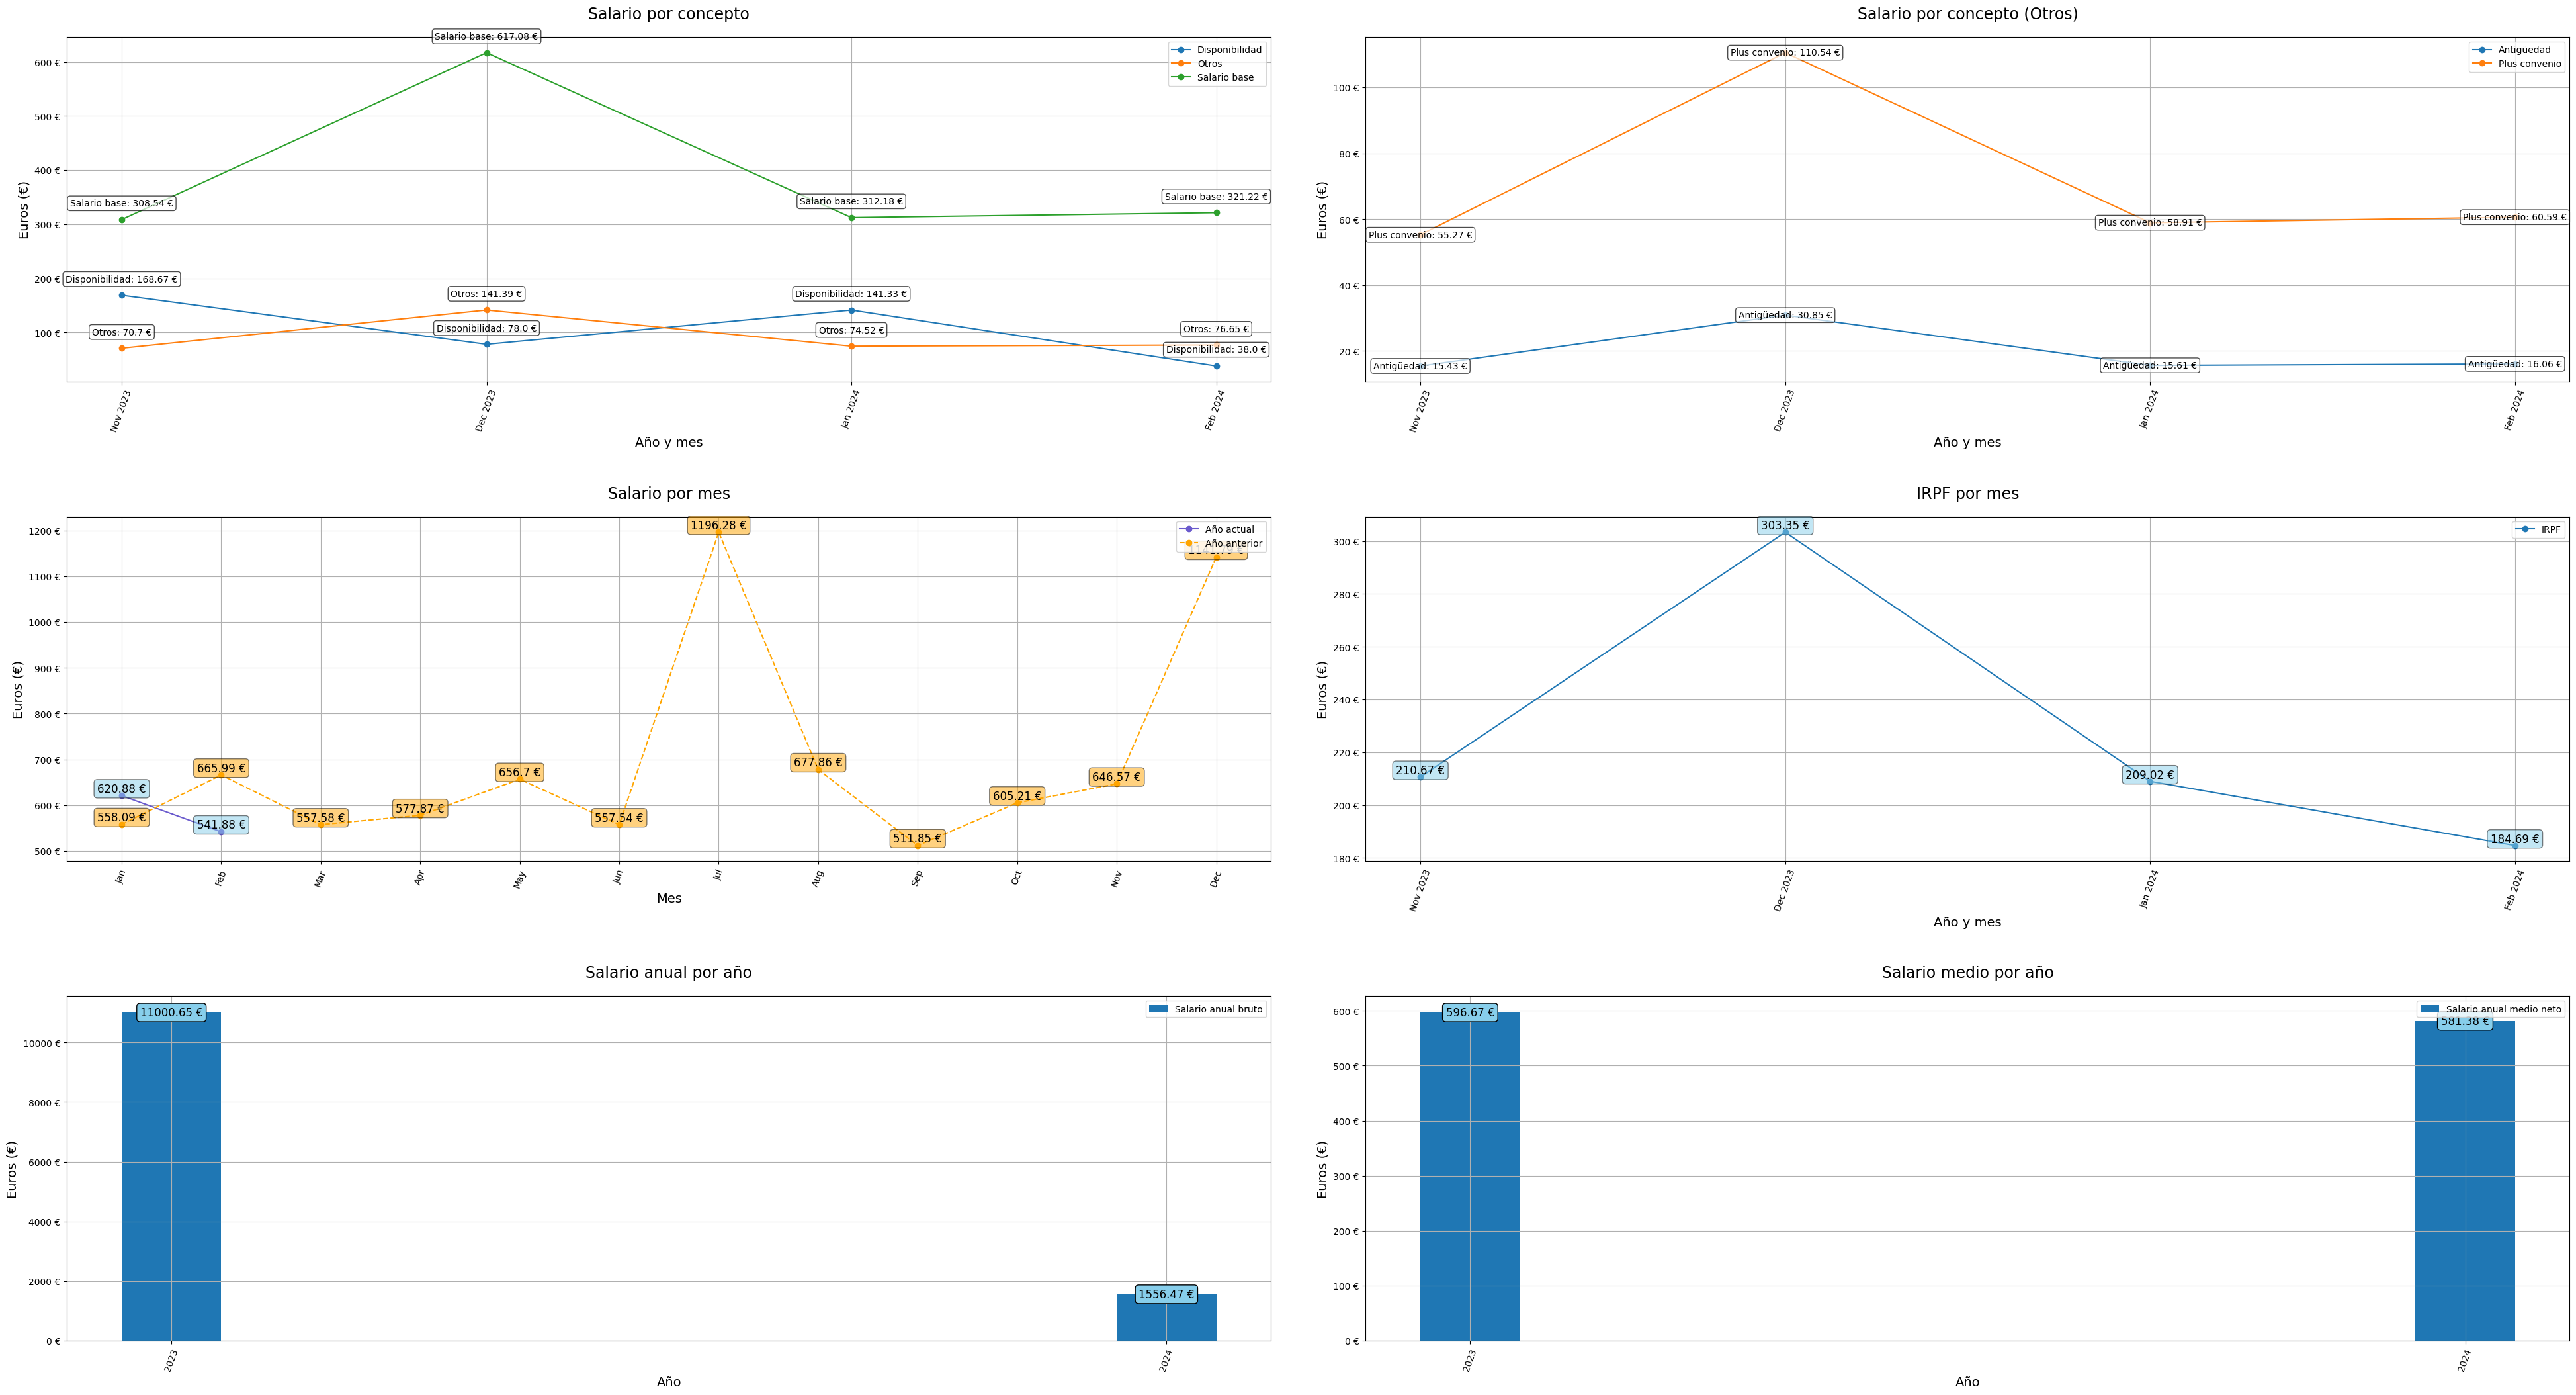

In [10]:
fig, ax = plt.subplot_mosaic("AB;CF;DE", figsize=(40, 22))

df_last_year_last_two_months = df_last_year.loc[
    df_last_year["month_number"].isin([11, 12])
]
df_actual_year_and_two_months = pd.concat(
    [df_last_year_last_two_months, df_actual_year]
)
df_actual_year_and_two_months["concept_label"] = df_actual_year_and_two_months[
    "concept"
].apply(
    lambda x: (
        x if x in ["Salario base", "Disponibilidad", "Mejora voluntaria"] else "Otros"
    )
)

plot_earnings_concepts_by_month(ax["A"], df_actual_year_and_two_months)
plot_earnings_by_month(ax["C"])
plot_earnings_concepts_by_month_others(ax["B"], df_actual_year_and_two_months)

(plot_earnings_by_year, plot_earnings_mean_by_year) = plots_bars()
plot_earnings_by_year(ax["D"])
plot_earnings_mean_by_year(ax["E"])

plot_irpf_by_month(ax["F"], df_actual_year_and_two_months)

fig.tight_layout(pad=4.0)

plt.show()

In [11]:
fig.savefig("examples/output.png")